In [30]:
import numpy as np
import csv
import pandas as pd
from xml.etree import ElementTree
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.callbacks import History

In [4]:
def load_Data(file):
    tree = ElementTree.parse(file)
    root = tree.getroot()
    weldSignatures = []
    weldSignature = []
    Counts = []
    
    for att in root:
        ListComp = att.find('ListComp').text
        ListDist = att.find('ListDist').text
        ListAmp = att.find('ListAmp').text
        ListEnergy = att.find('ListEnergy').text
        weldSignature = ListComp+ListDist+ListAmp+ListEnergy
        weldSignatures.append(weldSignature) 

    weldSignia = []
    weldSign = []
    for weldSignature in weldSignatures:
        weldSignature = weldSignature.split(',')
        Count = len(weldSignature)
        for val in weldSignature:
            weldSign.append(int(val))
        weldSignia.append(weldSign)
        Counts.append(Count)
        weldSign = []

    i = 0
    newWeldSignia = [] 
    maxNum = max(Counts)
    for signia in weldSignia:
        update = maxNum - Counts[i]
        for g in range(update):
            signia.append(0)
        signia.append('\n')    
        i = i + 1
        newWeldSignia.append(signia)
    return newWeldSignia;

In [123]:
Data_200J = load_Data('CNN_Weld_Monitoring/Data_200J.xml')

In [124]:
#Data_300J = load_Data('CNN_Weld_Monitoring/Data_300J.xml')

In [125]:
#Data_400J = load_Data('CNN_Weld_Monitoring/Data_400J.xml')

In [126]:
#Data_500J = load_Data('CNN_Weld_Monitoring/Data_500J.xml')

In [127]:
def write_csv(written_file, read_list):
    with open(written_file, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(read_list)

In [128]:
#write_csv('Data_200J.csv', Data_200J)

In [53]:
#write_csv('Data_300J.csv', Data_300J)

In [54]:
#write_csv('Data_400J.csv', Data_400J)

In [55]:
#write_csv('Data_500J.csv', Data_500J)

In [9]:
df_200 = pd.read_csv('CNN_Weld_Monitoring/Data_200J.csv', header= None)
#df_200.drop(df_200.columns[625], axis=1, inplace = True)
df_200.head(5)

,0,1,2,3,4,5,6,7,8,9,...,756,757,758,759,760,761,762,763,764,765
0,30,40,52,60,72,82,90,102,109,122,...,0,0,0,0,0,0,0,0,0,52
1,27,42,50,63,73,82,95,103,117,125,...,0,0,0,0,0,0,0,0,0,55
2,35,44,57,65,75,87,94,106,114,126,...,0,0,0,0,0,0,0,0,0,49
3,26,38,48,58,72,77,89,101,109,121,...,0,0,0,0,0,0,0,0,0,145
4,27,37,51,59,67,81,89,100,110,118,...,0,0,0,0,0,0,0,0,0,46


In [83]:
df_300 = pd.read_csv('CNN_Weld_Monitoring/Data_300J.csv', header= None)
#df_300.drop(df_300.columns[677], axis=1, inplace = True)
df_300.head(5)

,0,1,2,3,4,5,6,7,8,9,...,668,669,670,671,672,673,674,675,676,677
0,35,40,52,62,72,82,88,103,110,119,...,0,0,0,0,0,0,0,0,0,55
1,36,43,55,67,74,86,92,102,115,121,...,300,0,0,0,0,0,0,0,0,60
2,27,41,47,58,71,78,89,97,109,118,...,0,0,0,0,0,0,0,0,0,91
3,40,51,62,70,81,89,100,110,116,129,...,300,300,300,300,300,0,0,0,0,42
4,29,38,48,62,69,84,89,99,112,119,...,300,300,300,300,300,0,0,0,0,102


In [84]:
df_400 = pd.read_csv('CNN_Weld_Monitoring/Data_400J.csv', header= None)
#df_400.drop(df_400.columns[717], axis=1, inplace = True)
df_400.head(5)

,0,1,2,3,4,5,6,7,8,9,...,708,709,710,711,712,713,714,715,716,717
0,32,42,51,63,73,80,95,100,112,122,...,0,0,0,0,0,0,0,0,0,73
1,32,41,49,65,71,82,91,100,112,119,...,0,0,0,0,0,0,0,0,0,124
2,39,49,60,68,81,87,99,110,117,128,...,0,0,0,0,0,0,0,0,0,68
3,32,40,54,63,71,82,92,104,110,119,...,0,0,0,0,0,0,0,0,0,81
4,37,47,59,66,77,88,95,110,113,124,...,400,400,400,400,400,400,400,400,400,40


In [85]:
df_500 = pd.read_csv('CNN_Weld_Monitoring/Data_500J.csv', header= None)
#df_500.drop(df_500.columns[765], axis=1, inplace = True)
df_500.head(4)

,0,1,2,3,4,5,6,7,8,9,...,756,757,758,759,760,761,762,763,764,765
0,48,61,65,74,81,90,100,103,114,122,...,500,0,0,0,0,0,0,0,0,195
1,53,62,69,74,82,89,96,105,110,120,...,0,0,0,0,0,0,0,0,0,88
2,66,72,81,85,92,99,102,112,115,124,...,0,0,0,0,0,0,0,0,0,109
3,73,79,84,89,96,98,106,112,115,124,...,0,0,0,0,0,0,0,0,0,172


In [10]:
output_200 = df_200.iloc[:,-1]
train_Y = output_200.to_numpy()
train_Y

array([ 52,  55,  49, 145,  46,  29,  33,  70,  43,  47,  59,  24,  53,
        94,  33,  44,  72, 106,  64,  38, 105,  72,  61,  49,  56,  25,
        64,  26, 117,  65,  36,  53,  61,  65,  36,  53,  67,  42,  34,
       103,  55,  60,  91,  42, 102,  62,  49,  59,  74,  74,  61,  99,
       135,  45,  61,  67,  62,  65, 110,  60,  97,  72,  51,  48, 105,
        43,  35,  59, 128, 103,  86,  33,  43,  85,  97,  71,  46, 155,
        54, 106,  73, 124,  68,  81,  40, 111, 132, 112,  91,  70,  49,
        39,  65,  47,  60,  82,  64,  77,  58,  93,  66,  91, 101,  69,
        54,  60,  94,  98, 239,  98,  81, 163,  73, 111,  57,  73, 170,
       104,  96,  41, 195,  88, 109, 172,  39, 141,  78, 101,  91,  73,
       103, 155, 116,  83, 165,  34, 100, 111,  43,  71, 169, 189,  83,
        68,  83,  39,  68, 154,  66,  78, 187,  75, 215, 108,  60,  71,
        94,  65, 111,  93])

In [11]:
input_200 = df_200.iloc[:,0:len(df_200.columns)-1]
train_X = input_200.to_numpy()
train_X

array([[30, 40, 52, ...,  0,  0,  0],
       [27, 42, 50, ...,  0,  0,  0],
       [35, 44, 57, ...,  0,  0,  0],
       ...,
       [50, 56, 66, ...,  0,  0,  0],
       [62, 66, 71, ...,  0,  0,  0],
       [68, 76, 82, ...,  0,  0,  0]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.25, random_state=42)

In [13]:
X_train.shape

(120, 765)

In [14]:
X_train = np.expand_dims(X_train, axis=2)

In [15]:
X_train.shape

(120, 765, 1)

In [16]:
X_test = np.expand_dims(X_test, axis=2)

In [17]:
X_test.shape

(40, 765, 1)

In [18]:
#CNN Architecture
model = Sequential()
model.add(Convolution1D(filters=8, kernel_size=11, activation="relu", input_shape=(765,1)))
model.add(MaxPooling1D(strides=4))
model.add(BatchNormalization())
model.add(Convolution1D(filters=16, kernel_size=11, activation='relu'))
model.add(MaxPooling1D(strides=4))
model.add(BatchNormalization())
model.add(Convolution1D(filters=32, kernel_size=11, activation='relu'))
model.add(MaxPooling1D(strides=4))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [24]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true)))
    return ( 1 - SS_res/(SS_tot + K.epsilon()))
history = History()

In [25]:
model.compile(loss='mean_squared_error',optimizer='Adam', metrics=[coeff_determination])

In [26]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=400, batch_size=30, callbacks=[history])


Train on 120 samples, validate on 40 samples
Epoch 1/400
120/120 [==============================] - 4s 36ms/step - loss: 8093.1349 - coeff_determination: -5.4387 - val_loss: 7814.1588 - val_coeff_determination: -3.9911
Epoch 2/400
120/120 [==============================] - 0s 1ms/step - loss: 7713.2623 - coeff_determination: -4.5405 - val_loss: 7367.4404 - val_coeff_determination: -3.7053
Epoch 3/400
120/120 [==============================] - 0s 1ms/step - loss: 7311.5789 - coeff_determination: -4.2685 - val_loss: 6911.6000 - val_coeff_determination: -3.4187
Epoch 4/400
120/120 [==============================] - 0s 1ms/step - loss: 6749.5854 - coeff_determination: -4.1164 - val_loss: 6312.3126 - val_coeff_determination: -3.0411
Epoch 5/400
120/120 [==============================] - 0s 1ms/step - loss: 6130.4624 - coeff_determination: -3.4917 - val_loss: 5555.7255 - val_coeff_determination: -2.5639
Epoch 6/400
120/120 [==============================] - 0s 1ms/step - loss: 5340.2423 - c

Epoch 47/400
120/120 [==============================] - 0s 1ms/step - loss: 594.2531 - coeff_determination: 0.5731 - val_loss: 1599.8914 - val_coeff_determination: -0.1025
Epoch 48/400
120/120 [==============================] - 0s 1ms/step - loss: 725.1089 - coeff_determination: 0.4955 - val_loss: 1520.8347 - val_coeff_determination: -0.0577
Epoch 49/400
120/120 [==============================] - 0s 1ms/step - loss: 776.1123 - coeff_determination: 0.3877 - val_loss: 1259.6436 - val_coeff_determination: 0.1357
Epoch 50/400
120/120 [==============================] - 0s 1ms/step - loss: 605.3585 - coeff_determination: 0.5595 - val_loss: 1382.7386 - val_coeff_determination: 0.0648
Epoch 51/400
120/120 [==============================] - 0s 1ms/step - loss: 678.6912 - coeff_determination: 0.4545 - val_loss: 1489.9972 - val_coeff_determination: 2.1052e-04
Epoch 52/400
120/120 [==============================] - 0s 1ms/step - loss: 670.2851 - coeff_determination: 0.4647 - val_loss: 1283.6166 - 

Epoch 95/400
120/120 [==============================] - 0s 1ms/step - loss: 632.3846 - coeff_determination: 0.3774 - val_loss: 1249.3484 - val_coeff_determination: 0.1844
Epoch 96/400
120/120 [==============================] - 0s 1ms/step - loss: 476.0277 - coeff_determination: 0.6437 - val_loss: 1346.0620 - val_coeff_determination: 0.1264
Epoch 97/400
120/120 [==============================] - 0s 1ms/step - loss: 423.6460 - coeff_determination: 0.7044 - val_loss: 1265.2009 - val_coeff_determination: 0.1884
Epoch 98/400
120/120 [==============================] - 0s 1ms/step - loss: 476.4101 - coeff_determination: 0.5451 - val_loss: 1340.1426 - val_coeff_determination: 0.1372
Epoch 99/400
120/120 [==============================] - 0s 1ms/step - loss: 477.3589 - coeff_determination: 0.6171 - val_loss: 1411.5746 - val_coeff_determination: 0.0762
Epoch 100/400
120/120 [==============================] - 0s 1ms/step - loss: 586.0821 - coeff_determination: 0.4878 - val_loss: 1217.8161 - val_c

Epoch 143/400
120/120 [==============================] - 0s 1ms/step - loss: 420.0470 - coeff_determination: 0.6473 - val_loss: 1209.0090 - val_coeff_determination: 0.2696
Epoch 144/400
120/120 [==============================] - 0s 1ms/step - loss: 430.2773 - coeff_determination: 0.6647 - val_loss: 1163.1650 - val_coeff_determination: 0.3125
Epoch 145/400
120/120 [==============================] - 0s 1ms/step - loss: 401.3053 - coeff_determination: 0.7171 - val_loss: 1351.9154 - val_coeff_determination: 0.1758
Epoch 146/400
120/120 [==============================] - 0s 1ms/step - loss: 510.8557 - coeff_determination: 0.6161 - val_loss: 1258.9724 - val_coeff_determination: 0.2434
Epoch 147/400
120/120 [==============================] - 0s 1ms/step - loss: 433.3161 - coeff_determination: 0.6709 - val_loss: 1151.8651 - val_coeff_determination: 0.3066
Epoch 148/400
120/120 [==============================] - 0s 1ms/step - loss: 403.4236 - coeff_determination: 0.6696 - val_loss: 1171.3673 - 

120/120 [==============================] - 0s 1ms/step - loss: 434.0937 - coeff_determination: 0.6501 - val_loss: 1232.9254 - val_coeff_determination: 0.2939
Epoch 191/400
120/120 [==============================] - 0s 2ms/step - loss: 324.1144 - coeff_determination: 0.7608 - val_loss: 1278.5957 - val_coeff_determination: 0.2518
Epoch 192/400
120/120 [==============================] - 0s 2ms/step - loss: 433.0239 - coeff_determination: 0.6982 - val_loss: 1215.3814 - val_coeff_determination: 0.2702
Epoch 193/400
120/120 [==============================] - 0s 1ms/step - loss: 413.6563 - coeff_determination: 0.6907 - val_loss: 1088.3454 - val_coeff_determination: 0.3531
Epoch 194/400
120/120 [==============================] - 0s 1ms/step - loss: 439.1654 - coeff_determination: 0.6709 - val_loss: 1155.8242 - val_coeff_determination: 0.3017
Epoch 195/400
120/120 [==============================] - 0s 1ms/step - loss: 325.3944 - coeff_determination: 0.7531 - val_loss: 1358.5966 - val_coeff_dete

Epoch 238/400
120/120 [==============================] - 0s 1ms/step - loss: 456.4127 - coeff_determination: 0.6101 - val_loss: 1107.7361 - val_coeff_determination: 0.3167
Epoch 239/400
120/120 [==============================] - 0s 1ms/step - loss: 375.3832 - coeff_determination: 0.7063 - val_loss: 1387.5146 - val_coeff_determination: 0.0707
Epoch 240/400
120/120 [==============================] - 0s 1ms/step - loss: 425.6680 - coeff_determination: 0.6899 - val_loss: 1184.9630 - val_coeff_determination: 0.2302
Epoch 241/400
120/120 [==============================] - 0s 1ms/step - loss: 361.8806 - coeff_determination: 0.7348 - val_loss: 1154.9182 - val_coeff_determination: 0.2729
Epoch 242/400
120/120 [==============================] - 0s 1ms/step - loss: 504.8449 - coeff_determination: 0.5337 - val_loss: 1399.3721 - val_coeff_determination: 0.0762
Epoch 243/400
120/120 [==============================] - 0s 1ms/step - loss: 487.9890 - coeff_determination: 0.6223 - val_loss: 1253.4148 - 

120/120 [==============================] - 0s 1ms/step - loss: 429.4163 - coeff_determination: 0.6876 - val_loss: 1316.0569 - val_coeff_determination: 0.2114
Epoch 286/400
120/120 [==============================] - 0s 1ms/step - loss: 328.4468 - coeff_determination: 0.6774 - val_loss: 1257.5022 - val_coeff_determination: 0.2422
Epoch 287/400
120/120 [==============================] - 0s 1ms/step - loss: 459.3073 - coeff_determination: 0.6687 - val_loss: 1278.0516 - val_coeff_determination: 0.2202
Epoch 288/400
120/120 [==============================] - 0s 1ms/step - loss: 392.4498 - coeff_determination: 0.6879 - val_loss: 1404.5751 - val_coeff_determination: 0.1246
Epoch 289/400
120/120 [==============================] - 0s 1ms/step - loss: 415.2274 - coeff_determination: 0.6516 - val_loss: 1349.6665 - val_coeff_determination: 0.1933
Epoch 290/400
120/120 [==============================] - 0s 1ms/step - loss: 412.6842 - coeff_determination: 0.6426 - val_loss: 1353.3789 - val_coeff_dete

Epoch 333/400
120/120 [==============================] - 0s 1ms/step - loss: 324.3959 - coeff_determination: 0.7319 - val_loss: 1310.7021 - val_coeff_determination: 0.1897
Epoch 334/400
120/120 [==============================] - 0s 1ms/step - loss: 395.7305 - coeff_determination: 0.6889 - val_loss: 1249.3658 - val_coeff_determination: 0.2480
Epoch 335/400
120/120 [==============================] - 0s 1ms/step - loss: 333.7748 - coeff_determination: 0.7590 - val_loss: 1260.5264 - val_coeff_determination: 0.2372
Epoch 336/400
120/120 [==============================] - 0s 2ms/step - loss: 312.7400 - coeff_determination: 0.7625 - val_loss: 1326.3162 - val_coeff_determination: 0.1774
Epoch 337/400
120/120 [==============================] - 0s 1ms/step - loss: 282.5950 - coeff_determination: 0.7834 - val_loss: 1194.8954 - val_coeff_determination: 0.2956
Epoch 338/400
120/120 [==============================] - 0s 2ms/step - loss: 439.4203 - coeff_determination: 0.6215 - val_loss: 1203.2253 - 

120/120 [==============================] - 0s 1ms/step - loss: 287.9846 - coeff_determination: 0.7731 - val_loss: 1150.1738 - val_coeff_determination: 0.3050
Epoch 381/400
120/120 [==============================] - 0s 1ms/step - loss: 323.0642 - coeff_determination: 0.7657 - val_loss: 1243.8822 - val_coeff_determination: 0.2185
Epoch 382/400
120/120 [==============================] - 0s 1ms/step - loss: 306.1067 - coeff_determination: 0.7837 - val_loss: 1418.6903 - val_coeff_determination: 0.0889
Epoch 383/400
120/120 [==============================] - 0s 1ms/step - loss: 372.7023 - coeff_determination: 0.7242 - val_loss: 1280.9598 - val_coeff_determination: 0.2001
Epoch 384/400
120/120 [==============================] - 0s 1ms/step - loss: 354.0321 - coeff_determination: 0.7476 - val_loss: 1349.1198 - val_coeff_determination: 0.1299
Epoch 385/400
120/120 [==============================] - 0s 1ms/step - loss: 299.2657 - coeff_determination: 0.7576 - val_loss: 1392.4081 - val_coeff_dete

In [27]:
print(history.history.keys())

dict_keys(['val_loss', 'val_coeff_determination', 'loss', 'coeff_determination'])


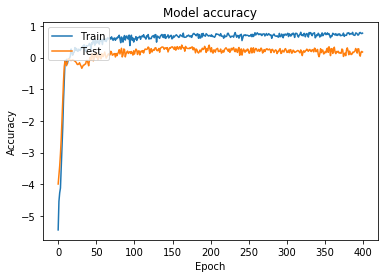

In [31]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

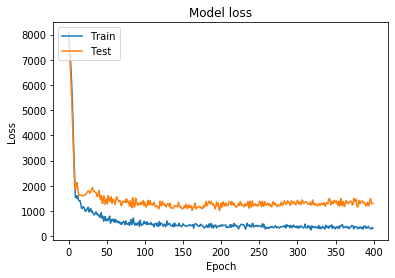

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()